In [108]:
# Import thư viện đọc dữ liệu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import MinMaxScaler
from scipy import stats


# df = pd.read_csv('./Rice2024.csv')
df = pd.read_excel('Rice2024.xlsx', engine='openpyxl')
df = pd.DataFrame(df)

print(df.head())

   Id Nickname Class   Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  \
0   1       R1     C  15231  525.578979         229.749878          85.093788   
1   2       R2     C  14656  494.311005         206.020065          91.730972   
2   3       R3     C  14634  501.122009         214.106781          87.768288   
3   4       R4     C  13176  458.342987         193.337387          87.448395   
4   5       R5     C  14688  507.166992         211.743378          89.312454   

   Eccentricity  Convex_Area    Extent  
0      0.928882      15617.0  0.572896  
1      0.895405      15072.0  0.615436  
2      0.912118      14954.0  0.693259  
3      0.891861      13368.0  0.640669  
4      0.906691      15262.0  0.646024  


In [109]:
# Xóa cột ‘Id’ và ‘Nickname’ Xóa cột ‘Id’ và ‘Nickname’
df = df.drop(['Id', 'Nickname'], axis=1)
print(df.head())

  Class   Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  \
0     C  15231  525.578979         229.749878          85.093788   
1     C  14656  494.311005         206.020065          91.730972   
2     C  14634  501.122009         214.106781          87.768288   
3     C  13176  458.342987         193.337387          87.448395   
4     C  14688  507.166992         211.743378          89.312454   

   Eccentricity  Convex_Area    Extent  
0      0.928882      15617.0  0.572896  
1      0.895405      15072.0  0.615436  
2      0.912118      14954.0  0.693259  
3      0.891861      13368.0  0.640669  
4      0.906691      15262.0  0.646024  


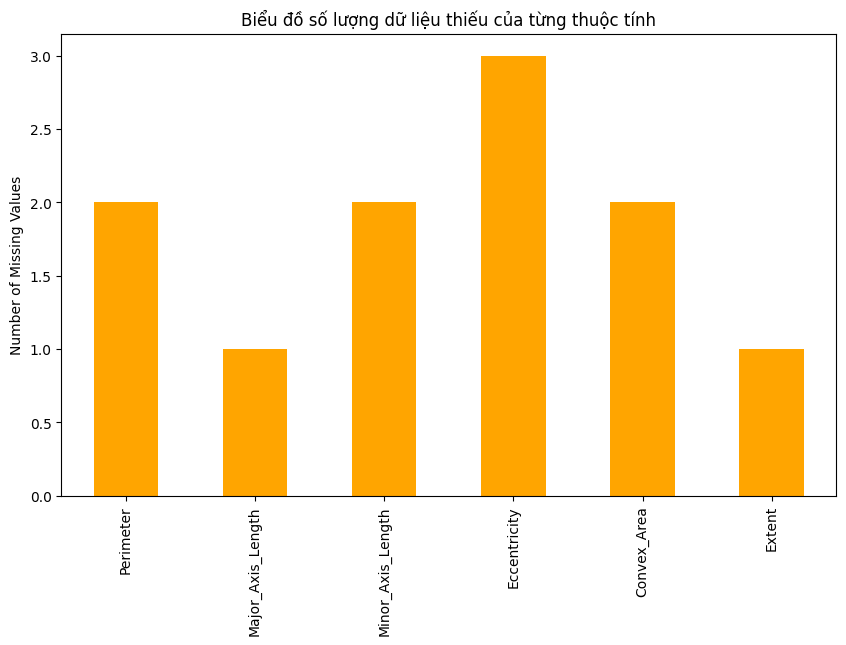

Đã xóa các hàng bị thiếu dữ liệu.


In [110]:
# Xóa các hàng có dữ liệu thiếu
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='orange')
plt.title('Biểu đồ số lượng dữ liệu thiếu của từng thuộc tính')
plt.ylabel('Number of Missing Values')
plt.show()
df = df.dropna()
print("Đã xóa các hàng bị thiếu dữ liệu.")

In [111]:
# xóa hàng 429,,,,0830078125
print("Xóa hàng Perimeter = 429,,,,0830078125")
df = df[df['Perimeter'] != '429,,,,0830078125']

Xóa hàng Perimeter = 429,,,,0830078125


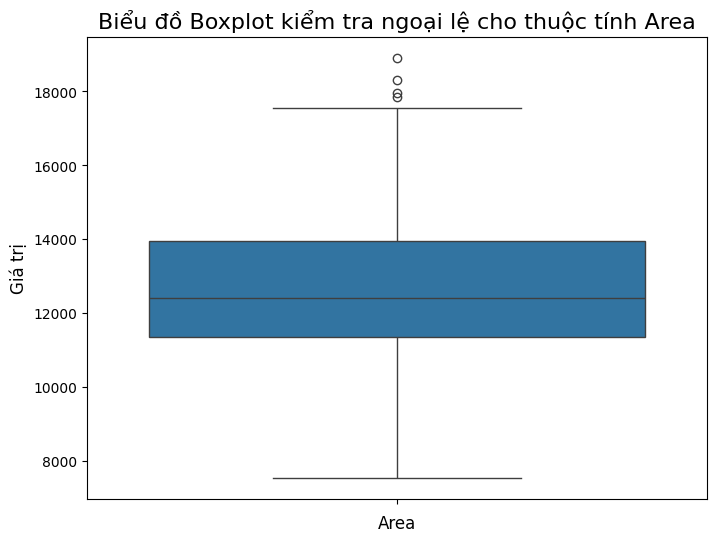

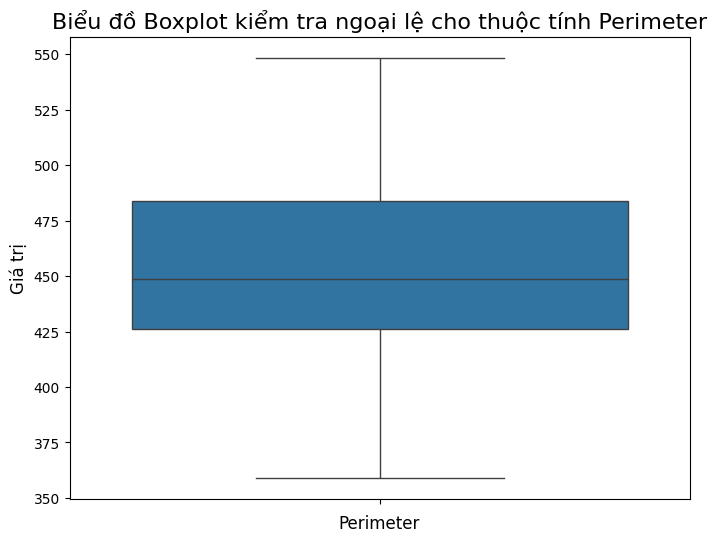

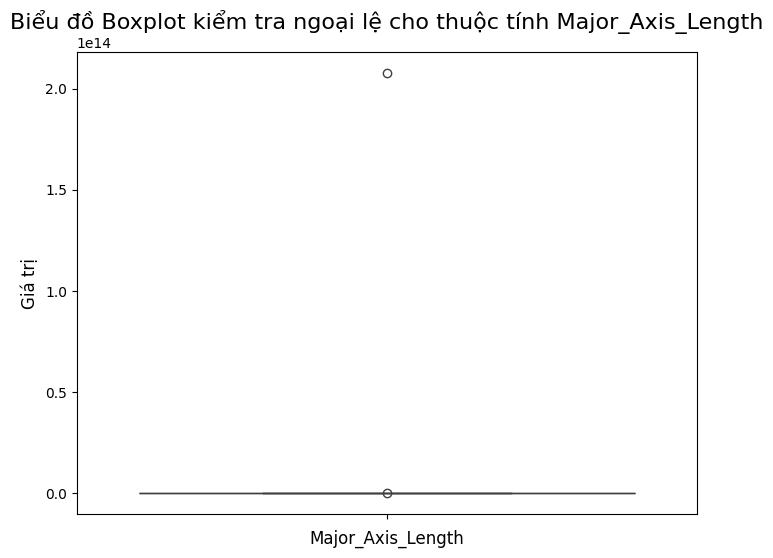

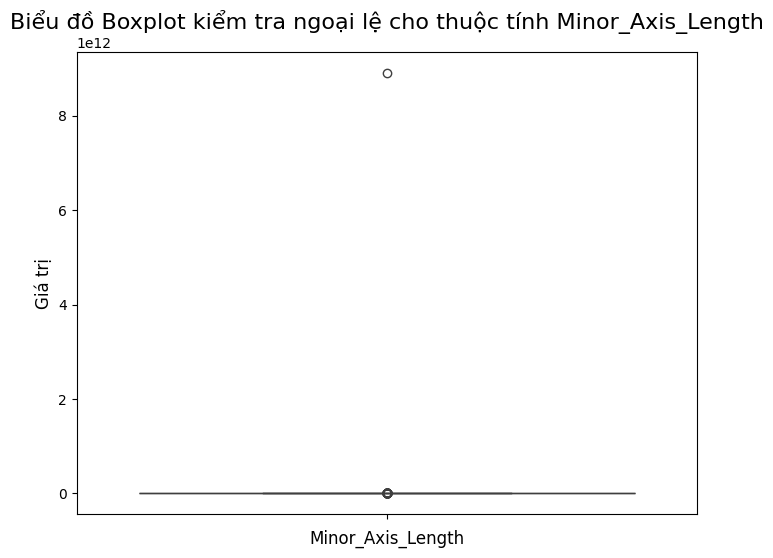

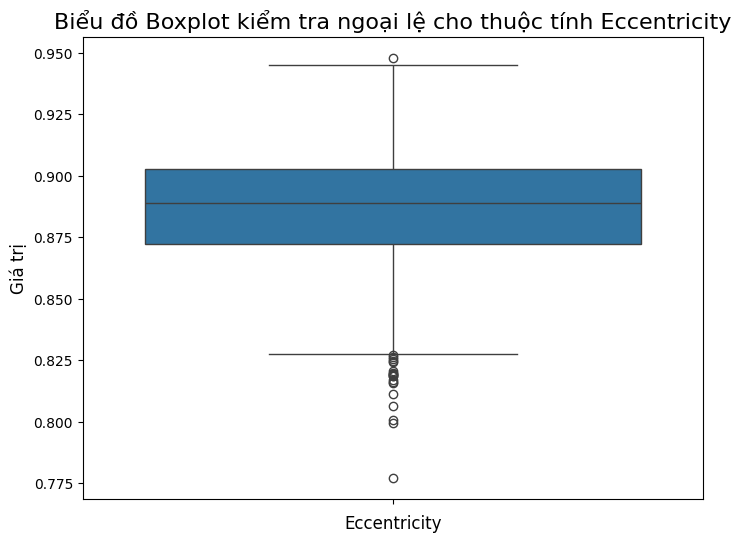

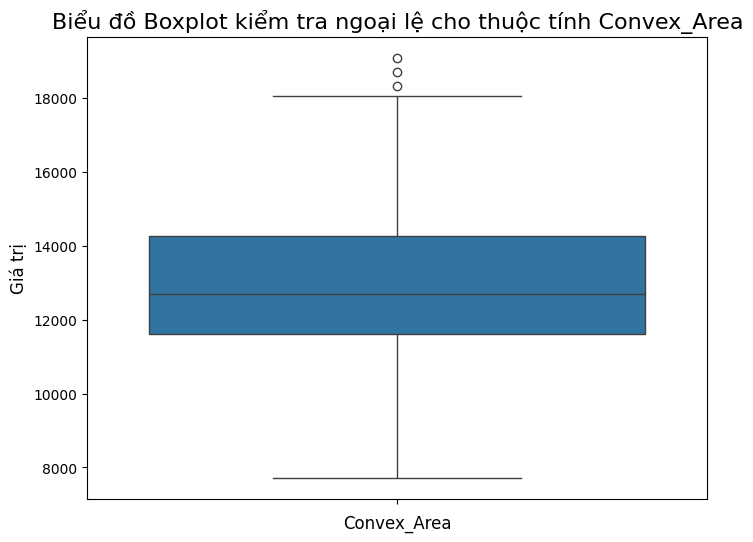

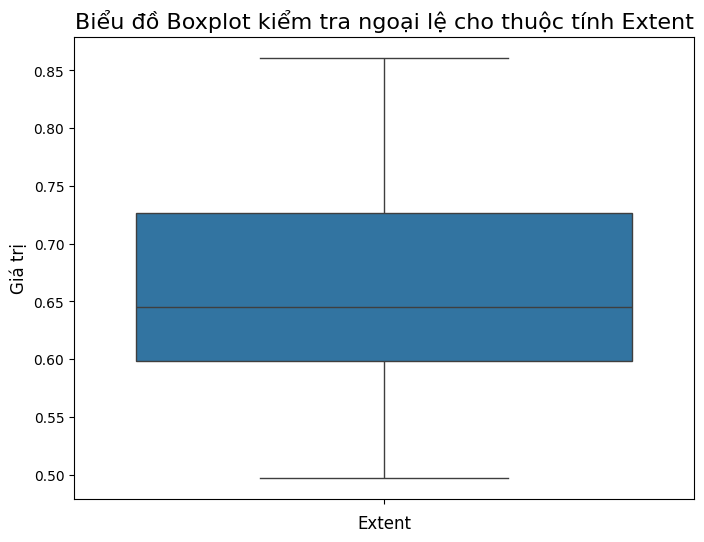

In [112]:
# Vẽ boxplot cho từng thuộc tính
for column in df.columns:
    if column != 'Id' and column != 'Class':  # Loại bỏ cột 'id' nếu cột này tồn tại
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df[column])  # Vẽ boxplot cho thuộc tính cụ thể
        plt.title(
            f'Biểu đồ Boxplot kiểm tra ngoại lệ cho thuộc tính {column}', fontsize=16)
        plt.xlabel(f'{column}', fontsize=12)
        plt.ylabel('Giá trị', fontsize=12)
        plt.show()
    

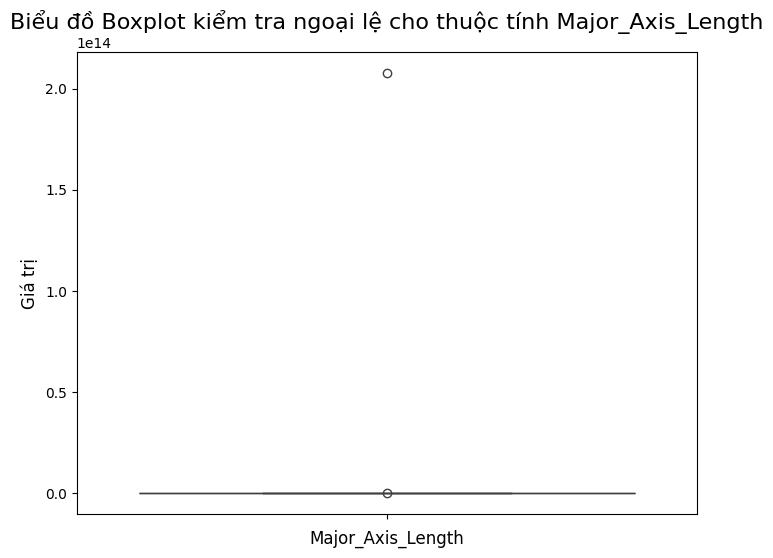

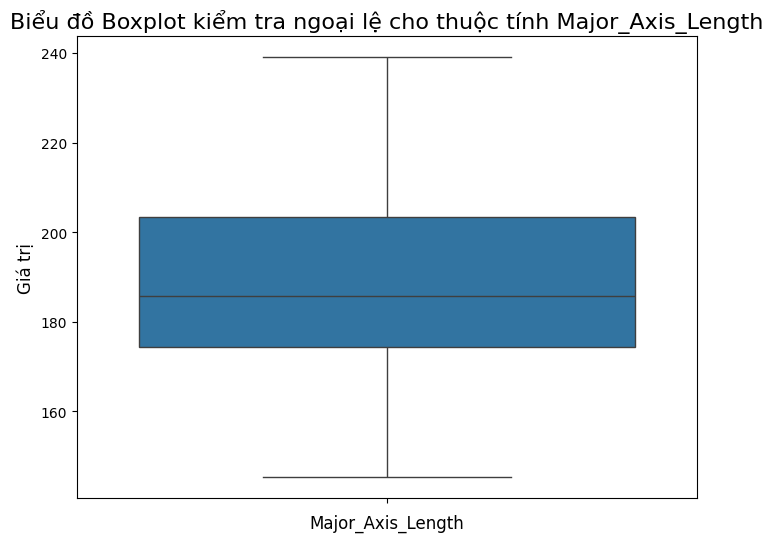

In [113]:
# Xử lý dữ liệu nhiễu cột Major_Axis_Length
column = 'Major_Axis_Length'

# Vẽ biểu đồ Boxplot sau khi loại bỏ dữ liệu nhiễu
plt.figure(figsize=(8, 6))
# Vẽ boxplot cho thuộc tính cụ thể
sns.boxplot(data=df['Major_Axis_Length'])
plt.title(
    f'Biểu đồ Boxplot kiểm tra ngoại lệ cho thuộc tính {column}', fontsize=16)
plt.xlabel(f'{column}', fontsize=12)
plt.ylabel('Giá trị', fontsize=12)
plt.show()

# Giả sử df là DataFrame đã tồn tại
df_clean_Major = df[df[column] <= 1000]
plt.figure(figsize=(8, 6))
# Vẽ boxplot cho thuộc tính cụ thể

sns.boxplot(data=df_clean_Major[column])
plt.title(
    f'Biểu đồ Boxplot kiểm tra ngoại lệ cho thuộc tính {column}', fontsize=16)
plt.xlabel(f'{column}', fontsize=12)
plt.ylabel('Giá trị', fontsize=12)
plt.show()

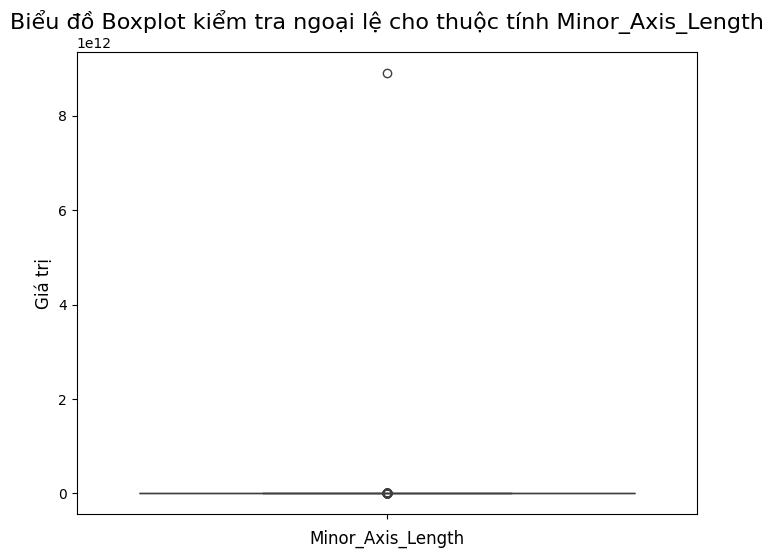

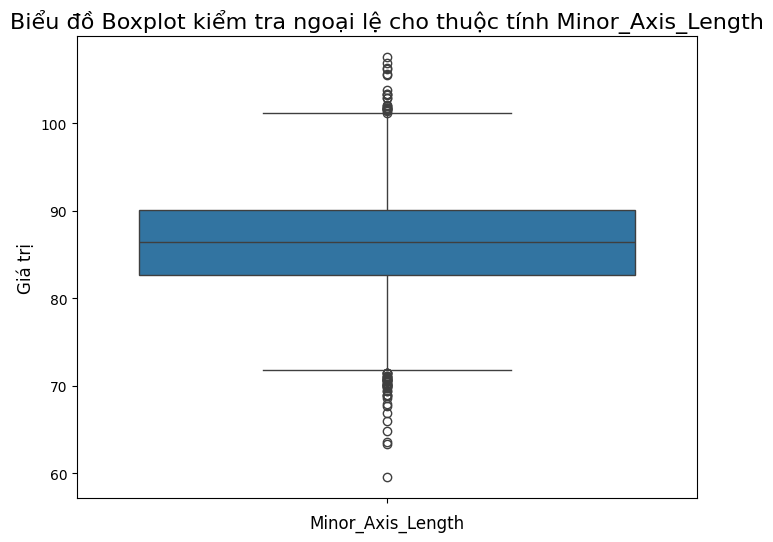

In [114]:
# Xử lý dữ liệu cột Minor_Axis_Length

import pandas as pd

column = 'Minor_Axis_Length'

# Vẽ biểu đồ Boxplot sau khi loại bỏ dữ liệu nhiễu
plt.figure(figsize=(8, 6))

# Vẽ boxplot cho thuộc tính cụ thể
sns.boxplot(data=df_clean_Major[column])
plt.title(
    f'Biểu đồ Boxplot kiểm tra ngoại lệ cho thuộc tính {column}', fontsize=16)
plt.xlabel(f'{column}', fontsize=12)
plt.ylabel('Giá trị', fontsize=12)
plt.show()

# Giả sử df là DataFrame đã tồn tại
df_clean_Minor = df_clean_Major[df_clean_Major[column] <= 1000]
plt.figure(figsize=(8, 6))

# Vẽ boxplot cho thuộc tính cụ thể
sns.boxplot(data=df_clean_Minor[column])
plt.title(
    f'Biểu đồ Boxplot kiểm tra ngoại lệ cho thuộc tính {column}', fontsize=16)
plt.xlabel(f'{column}', fontsize=12)
plt.ylabel('Giá trị', fontsize=12)
plt.show()

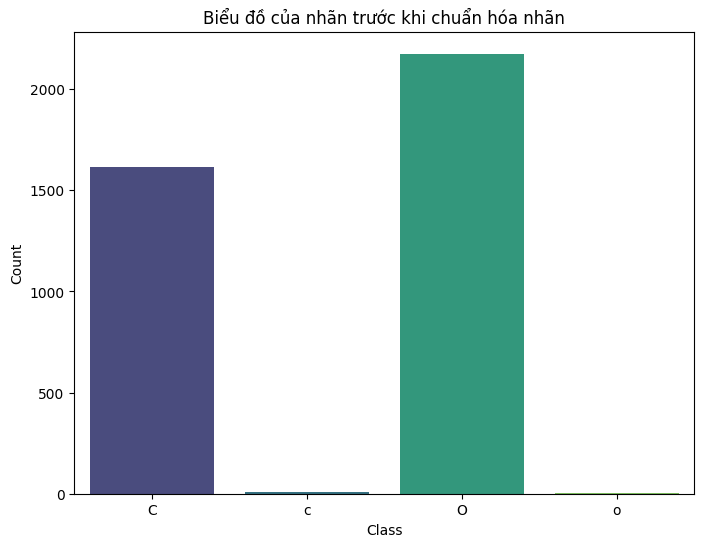

Chuẩn hóa cột nhãn: c -> C, o -> O
Label Encoding cho cột 'Class': C -> 0, O -> 1


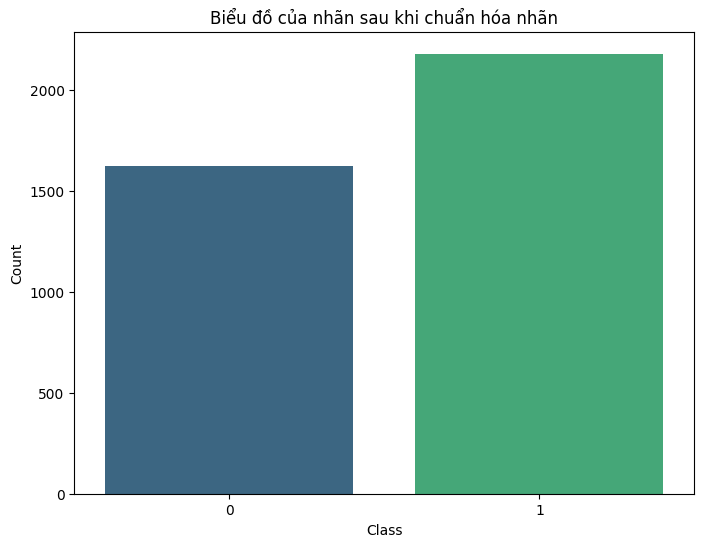

In [115]:
# Xử lý cột nhãn

plt.figure(figsize=(8, 6))
# Sử dụng bảng màu 'viridis' cho màu sắc khác nhau
sns.countplot(x='Class', data=df_clean_Minor, hue='Class', palette='viridis', legend=False)
plt.title('Biểu đồ của nhãn trước khi chuẩn hóa nhãn')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

print("Chuẩn hóa cột nhãn: c -> C, o -> O")
df_clean_Minor.loc[:, 'Class'] = df_clean_Minor['Class'].replace({'c': 'C', 'o': 'O'})

# Thực hiện Label Encoding cho các cột 'Class'
df_clean_Minor.loc[:, 'Class'] = df_clean_Minor['Class'].map({'C': 0, 'O': 1})
print("Label Encoding cho cột 'Class': C -> 0, O -> 1")


# Countplot - Biểu đồ đếm số lượng mẫu giữa các lớp
plt.figure(figsize=(8, 6))
# Sử dụng bảng màu 'viridis' cho màu sắc khác nhau
sns.countplot(x='Class', data=df_clean_Minor, hue='Class', palette='viridis', legend=False)
plt.title('Biểu đồ của nhãn sau khi chuẩn hóa nhãn')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [128]:
# Scale min-max
print("Dữ liệu trước khi scale:")
print(df_clean_Minor.head())

scaler = MinMaxScaler(feature_range=(0, 1))
# Chọn các cột số để chuẩn hóa
columns_to_scale = ['Area', 'Perimeter',
                    'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity', 'Extent', 'Convex_Area']
# Tạo một bản sao của DataFrame để chuẩn hóa
df_scaled = df_clean_Minor.copy()
# Áp dụng chuẩn hóa Min-Max
df_scaled[columns_to_scale] = scaler.fit_transform(
    df_scaled[columns_to_scale])

print("Dữ liệu sau khi scale:")
print(df_scaled.head())

Dữ liệu trước khi scale:
  Class   Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  \
0     0  15231  525.578979         229.749878          85.093788   
1     0  14656  494.311005         206.020065          91.730972   
2     0  14634  501.122009         214.106781          87.768288   
3     0  13176  458.342987         193.337387          87.448395   
4     0  14688  507.166992         211.743378          89.312454   

   Eccentricity  Convex_Area    Extent  
0      0.928882      15617.0  0.572896  
1      0.895405      15072.0  0.615436  
2      0.912118      14954.0  0.693259  
3      0.891861      13368.0  0.640669  
4      0.906691      15262.0  0.646024  
Dữ liệu sau khi scale:
  Class      Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  \
0     0  0.675937   0.879232           0.901216           0.532417   
1     0  0.625330   0.714095           0.648087           0.670663   
2     0  0.623394   0.750066           0.734349           0.588124   
3     0  0.495071

In [ ]:
# Lưu dataset
name_file = 'standardized-rice.csv'
# df_clean_Minor.to_csv(name_file, index=False)
print("Đã lưu standardized-rice.csv")